 Sentiment Analysis on IMDB Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets ML/IMDB Dataset.csv");

In [ ]:
print(df.isnull().sum())
print(df.shape)

review       0
sentiment    0
dtype: int64
(50000, 2)


<Axes: xlabel='sentiment', ylabel='count'>

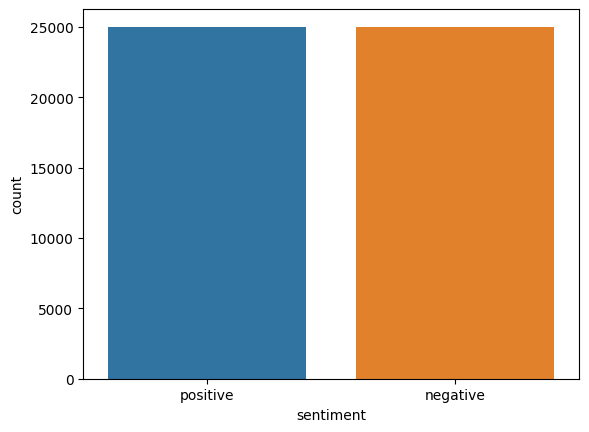

In [ ]:
sns.countplot(x='sentiment',data=df)


In [ ]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Removing NaN and Duplicate values for efficient training.

In [ ]:
df=df.drop_duplicates()
df = df.dropna()

In [ ]:
print(df.isnull().sum())
print(df.shape)

review       0
sentiment    0
dtype: int64
(49582, 2)


In [ ]:
df['review'][1]


'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

Data Cleaning

In [ ]:
import re

regex = re.compile("[^a-zA-Z]+")
for i in range(len(df['review'])):
  try:
    df['review'][i] = (regex.sub(" ", df['review'][i]).replace(' br ', "")).lower()
  except: pass


In [ ]:
df['review'][1]


'a wonderful little productionbr the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piecebr the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his lifebr the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done '

The processes of Stopword removal and Lemmatization are achieved by **NLTK Module**'s *stopwords* and *WordNetLemmatizer* Packages.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

for i in range(len(df['review'])):
  try:
    words = word_tokenize(df['review'][i])
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    df['review'][i] = ' '.join(filtered_words)
  except: 
    pass



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['review'][1]

'wonderful little productionbr filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piecebr actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy lifebr realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

The Vectorization of String Data for Training Classification Models is accomplished with the help of ***CountVectorizer*** function from **sklearn's feature_extraction.text module**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
# tokening = RegexpTokenizer(r'[a-zA-Z0-9+]')
cv = CountVectorizer(stop_words = 'english', ngram_range = (1,1))
# tokenizer = tokening.tokenize
reviewCounts = cv.fit_transform(df['review'])
# print(reviewCounts[35465])

To make the target column suitable for Model, we convert the string values of 'sentiment' column to NumericLabels by passing them through *LabelEncoder* class of **sklearn's preprocessing** Module

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [ ]:
df['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49582, dtype: int64

Upon visualization of target column('sentiment') with **seaborn**'s ***countplot***, we can observe that this is a balanced Dataset.

<Axes: xlabel='sentiment', ylabel='count'>

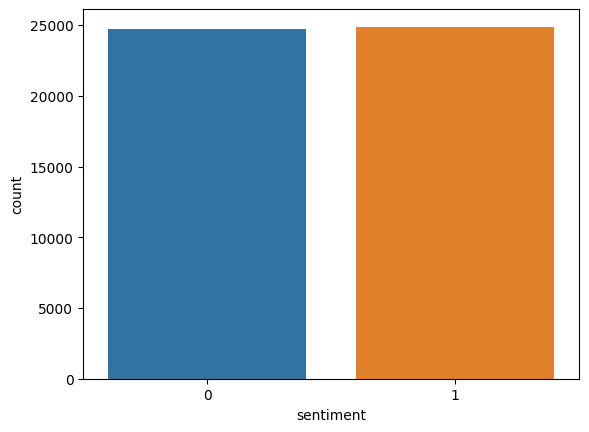

In [ ]:
import seaborn as sns
sns.countplot(data = df, x= 'sentiment')

Splitting the Dataset for Training and testing parts, with the help of ***train_test_split()*** function from **sklearn**'s **model_selection**

We have opted a **test_size of 0.1** for a dataset of approx. 50,000 and a **random_state of 5.**

In [ ]:
X_train, X_test, y_train, y_test = tts(reviewCounts, df['sentiment'], test_size = 0.1, random_state =10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

Process of Training a model
- Fitting the model on Train data (.fit())
- Prediction on Test Data (.predict())
- Calculating the Metrics between pred_test_target and test_target .

# Training LinearSupportVectorClassifier

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
svc_prediction = svc.predict(X_test)
svc_score = precision_recall_fscore_support(svc_prediction, y_test)
svc_auc = accuracy_score(svc_prediction, y_test)
print(svc_score)
print(svc_auc)

(array([0.8436247 , 0.87586207]), array([0.87302905, 0.84699882]), array([0.85807504, 0.86118867]), array([2410, 2549]))
0.8596491228070176


# Training the LogisticRegression Model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_prediction = lr.predict(X_test)
lr_score = precision_recall_fscore_support(lr_prediction, y_test)
lr_auc = accuracy_score(lr_prediction, y_test)
print(lr_score)
print(lr_auc)

(array([0.8712911 , 0.89249493]), array([0.89130435, 0.87266958]), array([0.8811841 , 0.88247092]), array([2438, 2521]))
0.8818310143174027


# Training the DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred = dtc.predict(X_test)
# dtc_pred.dropna()
dtc_score = precision_recall_fscore_support(dtc_pred, y_test)
dtc_auc = accuracy_score(dtc_pred, y_test)
print(dtc_score)
print(dtc_auc)

(array([0.73095429, 0.74279919]), array([0.74196174, 0.73181455]), array([0.73641689, 0.73726596]), array([2457, 2502]))
0.7368421052631579


# Training the MultinomialNaiveBayes Classifier

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
mnb_pred = mnb.predict(X_test)

mnb_score = precision_recall_fscore_support(mnb_pred, y_test)
mnb_auc = accuracy_score(mnb_pred, y_test)

print(mnb_score)
print(mnb_auc)

(array([0.87489976, 0.83894523]), array([0.84606437, 0.86890756]), array([0.86024049, 0.85366357]), array([2579, 2380]))
0.8570276265376083


In [ ]:
models = pd.Series(['Logistic Regression', 'MultionomialNB', 'Support Vector Classifier','DecisionTreeClassifier'])
acc = pd.Series([lr_auc, mnb_auc, svc_auc, dtc_auc])

result = pd.DataFrame({'Model':models, 'Accuracy':acc})

# Performance of Five Classification are Tabulated below.

In [ ]:
result

,Model,Accuracy
0,Logistic Regression,0.881831
1,MultionomialNB,0.857028
2,Support Vector Classifier,0.859649
3,DecisionTreeClassifier,0.736842
